The Fashion MNIST dataset is loaded. Each image is 28x28 pixels and grayscale, representing a piece of clothing from 10 categories.

The dataset is visualized to inspect the types of images we're dealing with. We ensure that all 10 categories are well represented.

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

Pixel values are normalized (scaled between 0 and 1) and the shape of the data is adjusted to match the input requirements for a convolutional neural network.

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


The model architecture is defined: it consists of two convolutional layers followed by max pooling, and then fully connected layers with dropout for regularization.

In [8]:


model = keras.Sequential(
    [
        keras.Input(shape=input_shape), 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),  
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),  
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"), 
    ]
)

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,018 (277.41 KB)

 Trainable params: 71,018 (277.41 KB)

 Non-trainable params: 0 (0.00 B)

The CNN model is compiled using the Adam optimizer and categorical crossentropy loss. It is trained for 15 epochs using 99% of the training set and 1% for validation.

In [9]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.01)

Epoch 1/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7400 - loss: 0.7168 - val_accuracy: 0.8717 - val_loss: 0.3505
Epoch 2/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8698 - loss: 0.3581 - val_accuracy: 0.8917 - val_loss: 0.2922
Epoch 3/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8895 - loss: 0.3004 - val_accuracy: 0.9017 - val_loss: 0.2760
Epoch 4/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8987 - loss: 0.2720 - val_accuracy: 0.9133 - val_loss: 0.2531
Epoch 5/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9067 - loss: 0.2538 - val_accuracy: 0.9000 - val_loss: 0.2564
Epoch 6/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9118 - loss: 0.2375 - val_accuracy: 0.8933 - val_loss: 0.2947
Epoch 7/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9183 - loss: 0.2186 - val_accuracy: 0.9200 - val_loss: 0.2263
Epoch 8/15
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9238 - loss: 

## Evaluate the trained model

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.27402153611183167
Test accuracy: 0.9093999862670898


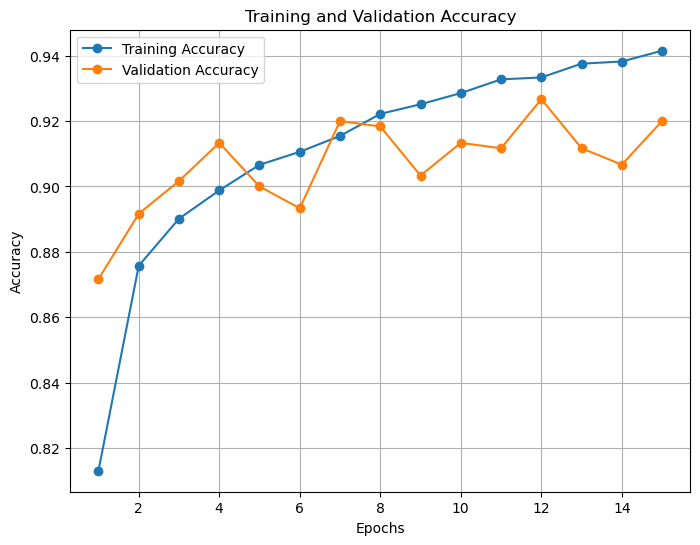

In [11]:

# Extract metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot the metrics
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()